In [186]:
# Pandas is used for data manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Read in data and display first 5 rows
features = pd.read_csv('Project_Portfolio.csv')
features.head(5)

,Project,Business Unit,Expected Duration (years),Actual Duration (years),Budget Amount,Actual Amount,Team Size,Result
0,Project A,IT,1.0,1.20,100000,125000,10,Successful
1,Project B,IT,1.5,0.50,200000,185000,12,Not Successful
2,Project C,SCM,2.0,3.00,200000,285000,2,Successful
3,Project D,SCM,1.5,1.00,100000,115000,3,Successful
4,Project E,SCM,1.0,0.75,2000000,2030000,20,Not Successful


In [187]:
# Descriptive statistics for each column
features.describe(include='all')

,Project,Business Unit,Expected Duration (years),Actual Duration (years),Budget Amount,Actual Amount,Team Size,Result
count,26,26,26.000000,26.000000,2.600000e+01,2.600000e+01,26.000000,26
unique,26,4,NaN,NaN,NaN,NaN,NaN,2
top,Project J,IT,NaN,NaN,NaN,NaN,NaN,Successful
freq,1,8,NaN,NaN,NaN,NaN,NaN,15
mean,NaN,NaN,1.115385,1.403846,2.333846e+05,2.524615e+05,10.461538,NaN
std,NaN,NaN,0.544200,0.994075,5.246764e+05,5.289917e+05,8.723443,NaN
min,NaN,NaN,0.250000,0.500000,1.000000e+04,6.000000e+03,2.000000,NaN
25%,NaN,NaN,0.750000,0.750000,3.400000e+04,4.500000e+04,3.000000,NaN
50%,NaN,NaN,1.000000,1.000000,5.000000e+04,1.000000e+05,9.000000,NaN
75%,NaN,NaN,1.500000,1.500000,2.000000e+05,1.850000e+05,12.000000,NaN


In [188]:
features= features.drop('Project', axis = 1)

In [189]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,Business Unit_Finance,Business Unit_IT,Business Unit_Operations,Business Unit_SCM,Result_Not Successful,Result_Successful
0,0,1,0,0,0,1
1,0,1,0,0,1,0
2,0,0,0,1,0,1
3,0,0,0,1,0,1
4,0,0,0,1,1,0


In [190]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Result_Successful'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Result_Successful', axis = 1)
features= features.drop('Result_Not Successful', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [191]:
## Instantiate and fit the RandomForestClassifier
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.50, random_state = 53, stratify=labels)
forest = RandomForestClassifier(n_estimators = 1000, random_state = 53)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=53)

In [192]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [193]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.46153846153846156

In [194]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test, target_names=['Fail', 'Successful']))

              precision    recall  f1-score   support

        Fail       0.25      0.20      0.22         5
  Successful       0.56      0.62      0.59         8

    accuracy                           0.46        13
   macro avg       0.40      0.41      0.41        13
weighted avg       0.44      0.46      0.45        13



In [198]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = forest.estimators_[0]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [196]:
# Get numerical feature importances
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Budget Amount        Importance: 0.25
Variable: Expected Duration (years) Importance: 0.18
Variable: Actual Duration (years) Importance: 0.18
Variable: Actual Amount        Importance: 0.12
Variable: Team Size            Importance: 0.12
Variable: Business Unit_SCM    Importance: 0.08
Variable: Business Unit_Operations Importance: 0.05
Variable: Business Unit_IT     Importance: 0.03
Variable: Business Unit_Finance Importance: 0.01


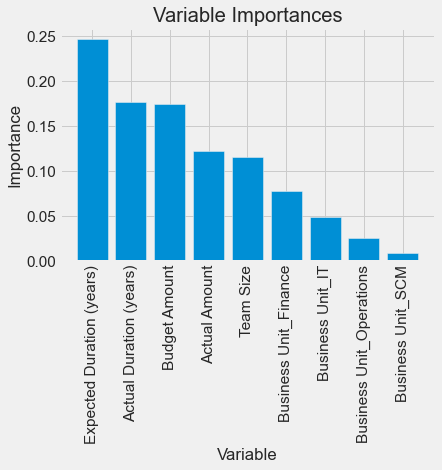

In [197]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
importances.sort(reverse=True)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:11], importances[:11], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:11], feature_list[:11], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');